In [14]:
import base64
from PIL import Image
from io import BytesIO

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob as gb
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout,Input
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

# Preprocessing and cleaning data

In [16]:
letters=['ا','ب','ت','ث','ج','ح','خ','د','ذ','ر','ز','س','ش','ص','ض','ط','ظ','ع','غ','ق','ك','ل','م','ن','ه','و','ي','لا']

In [17]:
X=[]
target=[]

## Loading and Preprocessing Arabic Letters Images

The following code block is used to load and preprocess images of Arabic letters. The images are read from a specified directory, resized, flattened, and stored in lists for further processing.

In [18]:
train_path='/kaggle/input/arabic-letters-numbers-ocr/Dataset/'
for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path  + folder +'/*.png'))
    if folder in letters:
        print(folder)
        for img in images:
            img=cv2.imread(img,0)
            img=cv2.resize(img,(28,28))
            flattened_img = img.flatten()
            X.append(flattened_img)
            target.append(folder)

س
و
ظ
ط
غ
ا
ض
ث
ذ
ق
ش
ص
ب
ت
لا
ي
ج
ح
خ
ز
ه
د
ك
م
ر
ل
ن
ع


In [19]:
#checking that the flattened array is in the write dimentions
len(X[1])

784

### Reshaping the Image Data

The following code block reshapes the flattened image data into 2D format, suitable for plotting.

In [20]:
data_len=len(X)
n_imgs = data_len
n_pix = 28
data_reshaped = np.array(X).reshape(n_imgs, n_pix, n_pix)

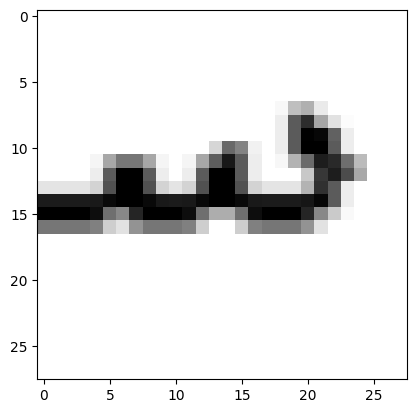

In [21]:
imgplot = plt.imshow(data_reshaped[0],cmap=plt.cm.binary)

### Encoding Target Labels

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)

In [24]:
y_encoded

array([11, 11, 11, ..., 17, 17, 17])

### converting the features and target lists into numpy arrays

In [25]:
y_encoded=np.array(y_encoded)
X=np.array(X)

### Slicing the data into trainning, validation and test data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [28]:
X_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Building the Model

In [29]:
tf.random.set_seed(1234)
model_1 = Sequential(
    [
        Input(shape=(784,),name="L0"),
        Dense(300, activation = 'relu',   name = "L1"),
        Dropout(0.2),
        Dense(200, activation = 'relu',   name = "L2"),
        Dropout(0.2),
        Dense(100, activation = 'relu',   name = "L3"),
        Dropout(0.2),
        Dense(29, activation = 'softmax', name = "L4")
    ]
)

In [30]:
model_1.compile(
       optimizer=tf.keras.optimizers.Adam(0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [31]:
model_1_fit_result=model_1.fit(
    X_train,y_train,epochs=30,batch_size=64,validation_data=(X_val,y_val)
)

Epoch 1/30
 73/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1169 - loss: 35.1591

I0000 00:00:1721262461.925831     897 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721262461.940970     897 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3220 - loss: 9.2845

W0000 00:00:1721262469.005297     896 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1721262469.528189     895 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


652/652 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.3222 - loss: 9.2754 - val_accuracy: 0.8081 - val_loss: 0.6264
Epoch 2/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7238 - loss: 0.9173 - val_accuracy: 0.9045 - val_loss: 0.3119
Epoch 3/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8313 - loss: 0.5663 - val_accuracy: 0.9285 - val_loss: 0.2283
Epoch 4/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8710 - loss: 0.4181 - val_accuracy: 0.9452 - val_loss: 0.1918
Epoch 5/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8931 - loss: 0.3669 - val_accuracy: 0.9543 - val_loss: 0.1594
Epoch 6/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9108 - loss: 0.3145 - val_accuracy: 0.9532 - val_loss: 0.1695
Epoch 7/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9223 - loss: 0.2728 - val_accuracy: 0.9665 - val_loss: 0.1261
Epoch 8/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9285 - loss: 0.2612 - val_accuracy: 0.9726 - va

### Analyzing the model's accuracy and loss

In [32]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 29)             │         2,929 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 956,189 (3.65 MB)

 Trainable params: 318,729 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 637,460 (2.43 MB)

In [33]:
model_1_fit_result.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
df_nn_1=pd.DataFrame(model_1_fit_result.history)
df_nn_1.head()

,accuracy,loss,val_accuracy,val_loss
0,0.475144,3.347753,0.808119,0.626377
1,0.757582,0.798286,0.904491,0.311906
2,0.846113,0.513988,0.928458,0.228267
3,0.881286,0.394930,0.945156,0.191758
4,0.900528,0.345448,0.954297,0.159412


In [35]:
df_nn_1.index += 1 
df_nn_1.index

RangeIndex(start=1, stop=31, step=1)

In [36]:
df_nn_1.tail()

,accuracy,loss,val_accuracy,val_loss
26,0.969386,0.136399,0.986325,0.083679
27,0.969074,0.131951,0.986037,0.098011
28,0.971809,0.122952,0.987764,0.092349
29,0.972601,0.119904,0.985461,0.082128
30,0.973584,0.112338,0.986613,0.069426


In [37]:
df_nn_1[df_nn_1["val_accuracy"]==df_nn_1["val_accuracy"].max()]

,accuracy,loss,val_accuracy,val_loss
28,0.971809,0.122952,0.987764,0.092349


In [38]:
df_nn_1[df_nn_1["val_loss"]==df_nn_1["val_loss"].min()]

,accuracy,loss,val_accuracy,val_loss
30,0.973584,0.112338,0.986613,0.069426


Text(0.5, 1.0, 'Validation accuracy (Model 1)')

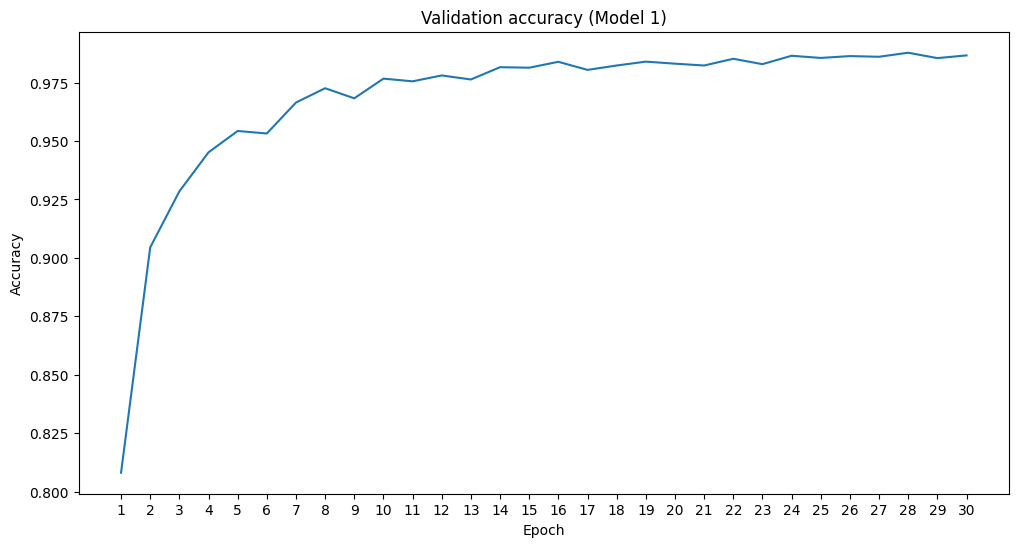

In [39]:
fig,ax=plt.subplots(figsize=(12,6))
plt.xticks(  df_nn_1.index.values )
plt.plot(df_nn_1.index.values,df_nn_1["val_accuracy"],label="val_accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Validation accuracy (Model 1)")

Text(0.5, 1.0, 'Validation loss (Model 1)')

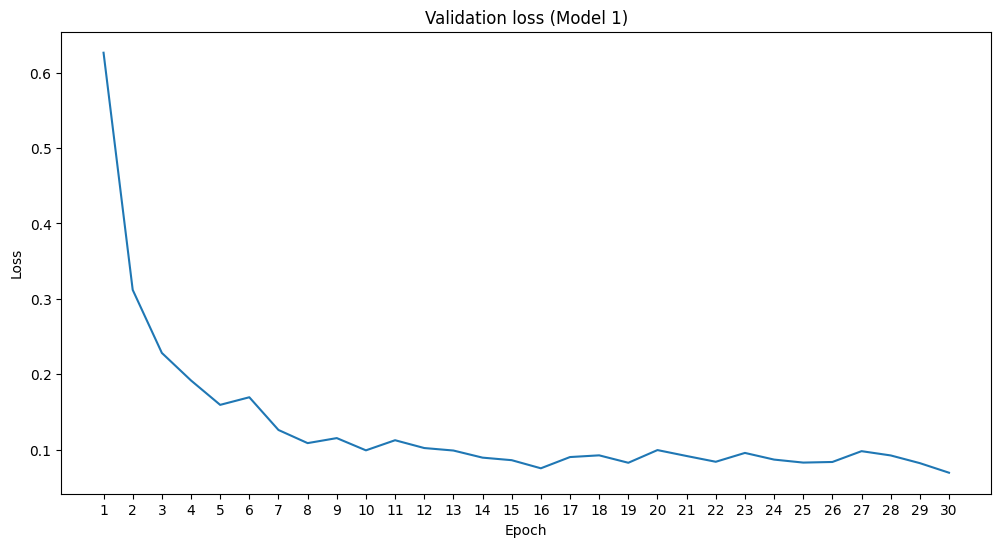

In [40]:
fig,ax=plt.subplots(figsize=(12,6))
plt.xticks(  df_nn_1.index.values )
plt.plot(df_nn_1.index,df_nn_1["val_loss"],label="val_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Validation loss (Model 1)")

# Evaluating and testng the Model

In [41]:
test_loss, test_accuracy = model_1.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

117/435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9854 - loss: 0.0527    

W0000 00:00:1721262570.705102     897 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9846 - loss: 0.0652
Test Loss: 0.07570172101259232
Test Accuracy: 0.9844537377357483


## Helper functions

In [42]:
#This function encodes an image into base64 code
#Parameters:
#    path (string): the directory path of the photo
#Returns:
#    image_base64 (string): the base64 code of the image
def encode_base64(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Convert the image to bytes
    _, buffer = cv2.imencode('.png', image)  # Use '.png' for better compression of grayscale images
    # Encode the bytes to base64
    image_base64 = base64.b64encode(buffer).decode('utf-8')
    return image_base64

In [43]:
#This function decodes an image from base64 code
#Parameters:
#    image_base64 (string): the base64 code of the image
#Returns:
#    img: the image decoded
#    reocrd (array): a flattened array representation of the image

def decode_base64(image_base64):
    img_bytes = base64.b64decode(image_base64)

    # Step 5: Convert the bytes back to a NumPy array
    img_np_array = np.frombuffer(img_bytes, dtype=np.uint8)

    # Step 6: Decode the NumPy array back to an image using OpenCV
    img = cv2.imdecode(img_np_array, cv2.IMREAD_GRAYSCALE)  # Use cv2.IMREAD_COLOR for color images
    img=cv2.resize(img,(28,28))
    record = img.flatten()
    record = record.reshape(1, 784)
    return img,record



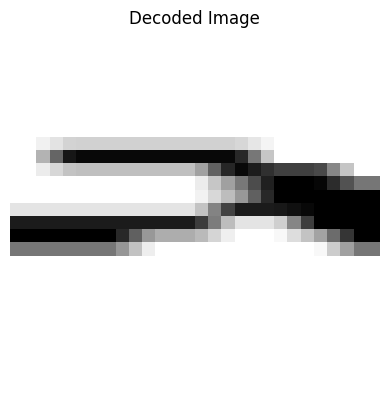

In [44]:
image_base64=encode_base64('/kaggle/input/arabic-letters-numbers-ocr/Dataset/ح/10.png')
img,record=decode_base64(image_base64)

# Display the image using matplotlib
plt.imshow(img,cmap=plt.cm.binary)
plt.title('Decoded Image')
plt.axis('off')  
plt.show()

In [47]:
# This function is used to predict one image using its base64 code
def predict(model,label_encoder,record):
    predicted_labels = model.predict(record)
    predicted_class = np.argmax(predicted_labels, axis=1)

    # Decode the predicted class back to the original category and extracting the prediction probability
    decoded_prediction = label_encoder.inverse_transform(predicted_class)
    predicted_class_probability = predicted_labels[0][predicted_class[0]]

    return decoded_prediction[0],int(predicted_class_probability)*100

In [48]:
predict(model_1,label_encoder,record)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


('ح', 100)

## uploading the model and the encoder

In [174]:
import pickle

In [175]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [177]:
model_1.save('model_1.h5')

In [178]:
from keras.models import load_model

# Load the Keras model from HDF5 format
model_1 = load_model('model_1.h5')

In [179]:
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)